# Regression Wavelet Forest:

In regression wavelet forest, training data is passed through a tree where every node has a small neural network that returns a probability that the sample 'belongs' to this node. The probability at each level is a multlipication of the node on that level and the nodes leading to this level: <br><br>
$\mu_l(x_i) = \Pi_m\mu_m(x_i)$
<br><br>
The valule in each node is determined by a 'vote' of the samples:
<br><br>
$\hat{y}=\sum_i\mu_l(x_i)y_i$

The prediction value is then determined by a 'vote' of the nodes: <br><br>
$\tilde{y_i} = \sum_l\mu_l(x_i)\hat{y}_l$

In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()

x,y = step_gen(range = (0,60),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs,conf=None)
run.fit(conf.epochs, learn)

run.recorder.plot_lr()

# from training import trainer
# train = trainer(xt,yt)

train: [0.13942347474359162, tensor(0.1394, device='cuda:0')]
valid: [0.2113668846361565, tensor(0.2114, device='cuda:0')]
train: [0.203267187621463, tensor(0.2033, device='cuda:0')]
valid: [0.2109176366016118, tensor(0.2109, device='cuda:0')]
train: [0.19236751575375077, tensor(0.1924, device='cuda:0')]
valid: [0.19992331302527225, tensor(0.1999, device='cuda:0')]
train: [0.1517025866911779, tensor(0.1517, device='cuda:0')]
valid: [0.1654993693033854, tensor(0.1655, device='cuda:0')]
train: [0.12802699074816348, tensor(0.1280, device='cuda:0')]
valid: [0.14200554472027402, tensor(0.1420, device='cuda:0')]
train: [0.12091068248843673, tensor(0.1209, device='cuda:0')]
valid: [0.12653377802685054, tensor(0.1265, device='cuda:0')]
train: [0.11551429976278277, tensor(0.1155, device='cuda:0')]
valid: [0.11527339858238143, tensor(0.1153, device='cuda:0')]
train: [0.10874883926923003, tensor(0.1087, device='cuda:0')]
valid: [0.10956770001035748, tensor(0.1096, device='cuda:0')]
train: [0.1013

train: [1.4390623178055038, tensor(1.4391, device='cuda:0')]
valid: [1.554067900686553, tensor(1.5541, device='cuda:0')]
train: [1.4773025740438432, tensor(1.4773, device='cuda:0')]
valid: [1.4727134935783617, tensor(1.4727, device='cuda:0')]
train: [1.3335277955923508, tensor(1.3335, device='cuda:0')]
valid: [1.2310014204545454, tensor(1.2310, device='cuda:0')]
train: [1.1463794309701492, tensor(1.1464, device='cuda:0')]
valid: [0.9672079375295928, tensor(0.9672, device='cuda:0')]
train: [0.9416234258395523, tensor(0.9416, device='cuda:0')]
valid: [0.7458104913884943, tensor(0.7458, device='cuda:0')]
train: [0.7993256981693097, tensor(0.7993, device='cuda:0')]
valid: [0.6427506880326704, tensor(0.6428, device='cuda:0')]
train: [0.6938021076259329, tensor(0.6938, device='cuda:0')]
valid: [0.5802009813713305, tensor(0.5802, device='cuda:0')]
train: [0.5558211597044076, tensor(0.5558, device='cuda:0')]
valid: [0.562019903009588, tensor(0.5620, device='cuda:0')]
train: [0.5025834268598414

train: [0.12124761325209889, tensor(0.1212, device='cuda:0')]
valid: [0.1344592585708156, tensor(0.1345, device='cuda:0')]
train: [0.12046565724842584, tensor(0.1205, device='cuda:0')]
valid: [0.128823066480232, tensor(0.1288, device='cuda:0')]
train: [0.1197063502980702, tensor(0.1197, device='cuda:0')]
valid: [0.12507502237955728, tensor(0.1251, device='cuda:0')]
train: [0.11904203500320662, tensor(0.1190, device='cuda:0')]
valid: [0.12236567410555753, tensor(0.1224, device='cuda:0')]
train: [0.11841471657824161, tensor(0.1184, device='cuda:0')]
valid: [0.1203498955928918, tensor(0.1203, device='cuda:0')]
train: [0.11786574178667211, tensor(0.1179, device='cuda:0')]
valid: [0.11931900255607836, tensor(0.1193, device='cuda:0')]
train: [0.11733383634197178, tensor(0.1173, device='cuda:0')]
valid: [0.11881860675233784, tensor(0.1188, device='cuda:0')]
train: [0.1168013501523146, tensor(0.1168, device='cuda:0')]
valid: [0.11854471148866595, tensor(0.1185, device='cuda:0')]
train: [0.1162

RuntimeError: CUDA error: device-side assert triggered

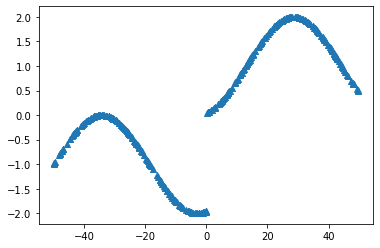

In [3]:
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
plt.scatter(xx, yy, marker='^')

for i in range(2,7):
    conf.tree_depth = 2*i
    learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)
    run.fit(conf.epochs, learn)
    zz = run.recorder.tot_pred.cpu().numpy()
    plt.scatter(xx, zz, marker='*')

plt.show()

In [ ]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()
conf.epochs = 100
conf.tree_depth = 15
conf.one_batch = True
x,y = step_gen(range = (0,100),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs)
run.fit(conf.epochs, learn)

In [ ]:
import matplotlib.pyplot as plt
mu = run.mu
y_hat = run.y_hat
arg_mu = torch.argmax(mu, dim=1).cpu().numpy()
uni_mu = np.unique(arg_mu)
yh = y_hat[arg_mu].detach().cpu().numpy()
yh_orig = y_hat.detach().cpu().numpy()
plt.hist(arg_mu,bins=30)

uni_mu_dist = mu[:,uni_mu].cpu().numpy()

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yh, marker='^')
plt.scatter(xx, yy, marker='*')
plt.scatter(xx, zz, marker='o')
plt.show()

for i in range(6):
    plt.scatter(xx, uni_mu_dist.T[i], marker='^')

plt.show()

### Loss vs. No. of batch iterations:

In [ ]:
run.recorder.plot_loss()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [ ]:
conf.epochs = 100
conf.one_batch = False
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs)
run.fit(conf.epochs, learn)

In [ ]:
run.recorder.plot_loss()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

### Fitting a sine function over 100 iterations:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [ ]:
# conf.epochs = 1000
# run.fit(conf.epochs, learn)

# import matplotlib.pyplot as plt
# import numpy as np

# xx = learn.data.valid_dl.ds.x.numpy()
# yy = learn.data.valid_dl.ds.y.numpy()
# zz = run.recorder.tot_pred.cpu().numpy()

# plt.scatter(xx, yy, marker='^')
# plt.scatter(xx, zz, marker='*')

# plt.show()

In [ ]:
conf.epochs = 100

In [ ]:
mu = run.mu
y_hat = run.y_hat

In [ ]:
arg_mu = torch.argmax(mu, dim=1).cpu().numpy()
uni_mu = np.unique(arg_mu)
arg_mu

In [ ]:
arg_mu

### Distribution of most popular leafs:

In [ ]:
plt.hist(arg_mu,bins=30)

### values of most popular leafs:

In [ ]:
yh_orig[uni_mu]

In [ ]:
yh = y_hat[arg_mu].detach().cpu().numpy()
yh_orig = y_hat.detach().cpu().numpy()

### Value of samples by most popular leaf:

In [ ]:
plt.scatter(xx, yh, marker='^')
plt.scatter(xx, yy, marker='*')
plt.scatter(xx, zz, marker='o')
plt.show()

In [ ]:
conf.epochs = 100
conf.tree_depth = 20

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

run.fit(conf.epochs, learn)

import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [ ]:
uni_mu

In [ ]:
uni_mu_dist = mu[:,uni_mu].cpu().numpy()

In [ ]:
uni_mu_dist.T

### Distribution of most popular nodes over all samples:

In [ ]:
for i in range(4):
    plt.scatter(xx, uni_mu_dist.T[i], marker='^')

plt.show()

In [ ]:
mu.size()

In [ ]:
len(yh_orig)

### Distribution of arbitrary samples over nodes:

In [ ]:
for i in range(10):
    j = i*33
    plt.scatter(j+100*mu[i*33,:].cpu().numpy(),np.arange(0,64), marker='*')

plt.show()

### Value of nodes of arbitrary samples vs. probability:

In [ ]:
for i in range(10):
    j = i*33
    plt.scatter(mu[i*33,:].cpu().numpy(),yh_orig, marker='*')

plt.show()

In [ ]:
plt.scatter(xx, yh, marker='^')
plt.scatter(xx, yy, marker='*')
plt.scatter(xx, zz, marker='o')
plt.show()